In [1]:
import torch
from torch.utils.data import TensorDataset
import numpy as np

In [2]:
# Assuming you have your data and labels as tensors
features = torch.load('C:/Users/parul/KIST_Research_Paper/features.pt')

In [3]:
features

tensor([[-4.8009, -1.2275, -3.4029,  ..., -1.9273, -1.0958,  1.6958],
        [-4.8076, -1.2441, -3.3980,  ..., -1.9423, -1.0766,  1.7222],
        [-4.8022, -1.2364, -3.3939,  ..., -1.9411, -1.0752,  1.7155],
        ...,
        [-1.8786,  1.6181,  0.0378,  ..., -1.1894,  0.6525, -1.3284],
        [-1.8312,  1.4049,  0.1747,  ..., -0.9394,  0.4374, -1.4905],
        [-1.8601,  1.3853,  0.1716,  ..., -0.9265,  0.4233, -1.4928]])

In [4]:
# Access the shape, size, and length of the features tensor
shape = features.shape
size = features.size() # Get the dimensionality of the feature vectors
length = len(features)

print("Shape:", shape)
print("Size:", size)
print("Length:", length)

Shape: torch.Size([94003, 1000])
Size: torch.Size([94003, 1000])
Length: 94003


In [5]:
len(features[0])

1000

In [6]:
import numpy as np

labels_path = "C:/Users/parul/KIST_Research_Paper/labels.npy"

# Load the labels array from the .npy file
labels = np.load(labels_path)

# Print the shape and contents of the loaded array
print("Array Shape:", labels.shape)
print("Array Contents:", labels)

Array Shape: (94003,)
Array Contents: [1. 1. 1. ... 0. 0. 0.]


In [7]:
# Load labels from npy file
labels_np = np.load('C:/Users/parul/KIST_Research_Paper/labels.npy')

# Convert labels to tensors
labels = torch.from_numpy(labels_np)

# Verify the type of the resulting tensor
print(type(labels))

<class 'torch.Tensor'>


In [8]:
import torch
from collections import Counter

# Convert labels to NumPy array as they are tensors
if isinstance(labels, torch.Tensor):
    labels = labels.numpy()

# Count the occurrences of each class label
class_counts = Counter(labels)

# Print class distribution
print("Class Distribution:")
for class_label, count in class_counts.items():
    print(f"Class {class_label}: {count} samples")

Class Distribution:
Class 1.0: 71755 samples
Class 0.0: 22248 samples


In [9]:
import torch
import numpy as np
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

# Convert labels to NumPy array
if isinstance(labels, torch.Tensor):
    labels = labels.numpy()

# Count the occurrences of each class label
class_counts = Counter(labels)

# Print class distribution before oversampling
print("Class Distribution Before Oversampling:")
for class_label, count in class_counts.items():
    print(f"Class {class_label}: {count} samples")

# Create RandomOverSampler instance
oversampler = RandomOverSampler(random_state=42)

# Reshape the dataset for the oversampler
num_samples, num_features = features.shape
features_reshaped = features.reshape(num_samples, -1)

# Perform oversampling
oversampled_features, oversampled_labels = oversampler.fit_resample(features_reshaped, labels)

# Reshape back to the original shape
oversampled_features = oversampled_features.reshape(-1, num_features)

# Convert back to PyTorch tensors
features = torch.tensor(oversampled_features)
labels = torch.tensor(oversampled_labels)
# 
# Count the occurrences of each class label after oversampling
oversampled_class_counts = Counter(labels.numpy())

# Print class distribution after oversampling
print("\nClass Distribution After Oversampling:")
for class_label, count in oversampled_class_counts.items():
    print(f"Class {class_label}: {count} samples")


Class Distribution Before Oversampling:
Class 1.0: 71755 samples
Class 0.0: 22248 samples

Class Distribution After Oversampling:
Class 1.0: 71755 samples
Class 0.0: 71755 samples


In [10]:
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader

In [11]:
x_train, x_val, y_train, y_val = train_test_split(features, labels, test_size=0.3, random_state=42, shuffle = True)
x_val, x_test, y_val, y_test = train_test_split(x_val, y_val, test_size=0.4, random_state=42, shuffle = True)

In [12]:
x_train

tensor([[-2.2960, -1.4940, -1.8903,  ..., -2.6258, -0.0291, -0.6367],
        [-4.3677, -1.4747,  0.3917,  ..., -3.2578, -0.0509, -0.0852],
        [-1.9103, -0.2454, -2.6092,  ..., -2.1218,  0.1021,  2.2596],
        ...,
        [-2.2974, -1.3273, -2.2430,  ..., -1.9776, -0.2803, -0.9984],
        [-0.9375, -0.2770, -3.0252,  ..., -2.5874,  0.5063,  0.8909],
        [-1.7555, -0.7285, -2.4615,  ..., -2.2939, -0.2912, -1.2019]])

In [13]:
y_train

tensor([0., 0., 0.,  ..., 0., 0., 0.], dtype=torch.float64)

In [14]:
val = np.unique(y_train)
val

array([0., 1.])

In [15]:
type(x_train)

torch.Tensor

In [16]:
type(y_train)

torch.Tensor

In [17]:
print("X_train shape is: \n", x_train.shape)
print("Y_train shape is: \n", y_train.shape)
print("\nX_val shape is: \n", x_val.shape)
print("Y_val shape is:\n", y_val.shape)
print("\nX_test shape is: \n", x_test.shape)
print("Y_test shape is: \n", y_test.shape)

X_train shape is: 
 torch.Size([100457, 1000])
Y_train shape is: 
 torch.Size([100457])

X_val shape is: 
 torch.Size([25831, 1000])
Y_val shape is:
 torch.Size([25831])

X_test shape is: 
 torch.Size([17222, 1000])
Y_test shape is: 
 torch.Size([17222])


In [18]:
len(x_train)

100457

In [19]:
x_train = x_train.view(100457, 4, 25, 10)
y_train = y_train.view(100457,1)
x_val = x_val.view(25831, 4, 25, 10)
y_val = y_val.view(25831,1)
x_test = x_test.view(17222, 4, 25, 10)
y_test = y_test.view(17222,1)


# Print the shapes of the train and test sets
print("X_train shape is: \n", x_train.shape)
print("Y_train shape is: \n", y_train.shape)
print("\nX_val shape is: \n", x_val.shape)
print("Y_val shape is:\n", y_val.shape)
print("\nX_test shape is: \n", x_test.shape)
print("Y_test shape is: \n", y_test.shape)

X_train shape is: 
 torch.Size([100457, 4, 25, 10])
Y_train shape is: 
 torch.Size([100457, 1])

X_val shape is: 
 torch.Size([25831, 4, 25, 10])
Y_val shape is:
 torch.Size([25831, 1])

X_test shape is: 
 torch.Size([17222, 4, 25, 10])
Y_test shape is: 
 torch.Size([17222, 1])


In [20]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
import torch.nn.functional as F

class CustomDataset(Dataset):
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels
    
    def __len__(self):
        return len(self.features)
    
    def __getitem__(self, index):
        x = self.features[index]
        y = self.labels[index]
        return x, y
        #return self.features[index], self.labels[index]
    
class RelationAwareFeatureExtractor(nn.Module):
    def __init__(self):
        super(RelationAwareFeatureExtractor, self).__init__()

        # ConvNet layers
        self.conv1 = nn.Conv2d(4, 8, kernel_size=3, stride=3, padding=1)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(8, 16, kernel_size=3, stride=3, padding=1)
        self.conv3 = nn.Conv2d(16, 32, kernel_size=3, stride=3, padding=1)
        self.conv4 = nn.Conv2d(32, 64, kernel_size=3, stride=3, padding=1)
        self.dropout1 = nn.Dropout(0.25)
        self.fc1 = nn.Linear(64*1*1, 1024)
        self.fc2 = nn.Linear(1024, 256)
        self.fc3 = nn.Linear(256, 125)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.pool1(x)
        x = F.relu(self.conv2(x))
        x = self.dropout1(x)
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        # Flatten the tensor before fully connected layers
        x = torch.flatten(x, start_dim=1)  # Flatten dimensions except batch dimension
        # Fully connected layers
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        return x

class SelfAttention(nn.Module):
    def __init__(self, hidden_size):
        super(SelfAttention, self).__init__()
        self.query = nn.Linear(hidden_size, hidden_size)
        self.key = nn.Linear(hidden_size, hidden_size)
        self.value = nn.Linear(hidden_size, hidden_size)

    def forward(self, x):
        # Add an extra dimension for seq_len
        x = x.unsqueeze(1)
        batch_size, seq_len, hidden_size = x.size()

        # Compute Query, Key, and Value matrices
        q = self.query(x)
        k = self.key(x)
        v = self.value(x)

        # Compute attention scores
        scores = torch.matmul(q, k.transpose(1, 2))
        attention_weights = F.softmax(scores, dim=2)

        # Compute the weighted sum of Value using attention weights
        x = torch.matmul(attention_weights, v)

        # Squeeze the extra seq_len dimension and return the result
        x = x.squeeze(1)
        return x

class ConditionalRandomFields(nn.Module):
    def __init__(self, hidden_size, num_labels):
        super(ConditionalRandomFields, self).__init__()
        self.hidden_size = hidden_size
        self.num_labels = num_labels
        
        self.linear1 = nn.Linear(hidden_size, num_labels)
        self.linear2 = nn.Linear(num_labels, num_labels)
        self.linear3 = nn.Linear(num_labels, 2)
        
    def forward(self, x):
        x = self.linear1(x)
        x = F.log_softmax(x, dim=1)
        x = self.linear2(x)
        x = F.log_softmax(x, dim=1)
        #x = self.linear3(x)
        return x

class AnomalyDetector(nn.Module):
    def __init__(self):
        super(AnomalyDetector, self).__init__()
        
        # Feature extractor
        self.feature_extractor = RelationAwareFeatureExtractor()

        # Self-attention layer
        self.self_attention = SelfAttention(125)

        # Conditional random fields layer
        self.conditional_random_fields = ConditionalRandomFields(125,2)

    def forward(self, x):
        # Extract features
        x = self.feature_extractor(x)
        x = self.self_attention(x)
        log_likelihood = self.conditional_random_fields(x)

        return log_likelihood

#### Training the Model:

In [21]:
# Initialize the models and move them to the desired device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [22]:
input_dim = 125
hidden_dim = 50
output_dim = 124

In [23]:
# Define the train and test datasets
train_dataset = CustomDataset(x_train, y_train)
val_dataset = CustomDataset(x_val, y_val)
test_dataset = CustomDataset(x_test, y_test)

# Define the train loader
batch_size = 4
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [24]:
num_classes = 2
num_epochs = 20
learning_rate = 0.00001

In [25]:
# Create an instance of the AnomalyDetector
model = AnomalyDetector()

In [26]:
from torchsummary import summary
# Move the model to the GPU if available
model.to(device)
summary(model, (4, 25, 10))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1              [-1, 8, 9, 4]             296
         MaxPool2d-2              [-1, 8, 4, 2]               0
            Conv2d-3             [-1, 16, 2, 1]           1,168
           Dropout-4             [-1, 16, 2, 1]               0
            Conv2d-5             [-1, 32, 1, 1]           4,640
            Conv2d-6             [-1, 64, 1, 1]          18,496
            Linear-7                 [-1, 1024]          66,560
            Linear-8                  [-1, 256]         262,400
            Linear-9                  [-1, 125]          32,125
RelationAwareFeatureExtractor-10                  [-1, 125]               0
           Linear-11               [-1, 1, 125]          15,750
           Linear-12               [-1, 1, 125]          15,750
           Linear-13               [-1, 1, 125]          15,750
    SelfAttention-14       

In [27]:
# Define the loss function
criterion = nn.CrossEntropyLoss() 

# Define the optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

In [28]:
def early_stopping(val_loss, patience=3):
    if len(val_loss) <= patience:
        return False
    
    for i in range(1, patience + 1):
        if val_loss[-i] > val_loss[-i - 1]:
            return True
        
    return False

In [29]:
# Initialize lists to store accuracy values
train_accuracy_history = []
val_accuracy_history = []

# Training loop
best_val_loss = float('inf')
patience = 3
val_loss_history = []
train_loss_history = []
verbose = True

l2_lambda = 0.0001 

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    correct = 0
    total = 0

    for batch_data, batch_labels in train_loader:
        optimizer.zero_grad()

        # Forward pass
        output = model(batch_data)
        
        batch_labels = batch_labels.view(-1)

        # Compute loss
        ce_loss = criterion(output, batch_labels.long())
        
        l2_reg = 0.0
        for param in model.parameters():
            l2_reg += torch.norm(param, p=2)

        # Combine the cross-entropy loss and L2 regularization term
        loss = ce_loss + l2_lambda * l2_reg

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = torch.max(output.data, 1)
        total += batch_labels.size(0)
        correct += (predicted == batch_labels).sum().item()

    train_loss /= len(train_loader)
    accuracy = correct / total
    train_accuracy_history.append(accuracy)
    train_loss_history.append(train_loss)
    
    if verbose: 
        print(f"\nEpoch [{epoch+1}/{num_epochs}] | Train Loss: {train_loss:.4f} | Train Accuracy: {accuracy:.2f}")
        
    # Evaluate the model on the validation set
    val_loss = 0.0
    val_correct = 0
    val_total = 0
    model.eval()
    with torch.no_grad():
        for val_batch_data, val_batch_labels in val_loader:
            outputs = model(val_batch_data)
            labels = val_batch_labels.view(-1)
            
            # Compute loss
            ce_val_loss = criterion(outputs, labels.long())
        
            l2_reg = 0.0
            for param in model.parameters():
                l2_reg += torch.norm(param, p=2)

            # Combine the cross-entropy loss and L2 regularization term
            loss = ce_val_loss + l2_lambda * l2_reg
            
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            val_total += val_batch_labels.size(0)
            val_correct += (predicted == val_batch_labels).sum().item()
            
        val_loss /=len(val_loader)
        val_acc = val_correct / val_total
        val_accuracy_history.append(val_acc)
        val_loss_history.append(val_loss)  
        
        if verbose:
            print(f"Epoch [{epoch+1}/{num_epochs}] | Validation Loss: {val_loss:.4f} | Validation Accuracy: {val_acc:.2f}")

    #Check for early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        patience_counter = 0
    else:
        patience_counter += 1

    if early_stopping(val_loss_history, patience):
        print("Early stopping triggered! ")
        break


Epoch [1/20] | Train Loss: 0.5804 | Train Accuracy: 0.66
Epoch [1/20] | Validation Loss: 0.3147 | Validation Accuracy: 0.81

Epoch [2/20] | Train Loss: 0.3091 | Train Accuracy: 0.88
Epoch [2/20] | Validation Loss: 0.2311 | Validation Accuracy: 0.91

Epoch [3/20] | Train Loss: 0.2394 | Train Accuracy: 0.91
Epoch [3/20] | Validation Loss: 0.1729 | Validation Accuracy: 0.96

Epoch [4/20] | Train Loss: 0.1846 | Train Accuracy: 0.94
Epoch [4/20] | Validation Loss: 0.1573 | Validation Accuracy: 0.96

Epoch [5/20] | Train Loss: 0.1713 | Train Accuracy: 0.94
Epoch [5/20] | Validation Loss: 0.1383 | Validation Accuracy: 0.97

Epoch [6/20] | Train Loss: 0.1450 | Train Accuracy: 0.95
Epoch [6/20] | Validation Loss: 0.1373 | Validation Accuracy: 0.96

Epoch [7/20] | Train Loss: 0.1306 | Train Accuracy: 0.96
Epoch [7/20] | Validation Loss: 0.2361 | Validation Accuracy: 0.92
Early stopping triggered! 


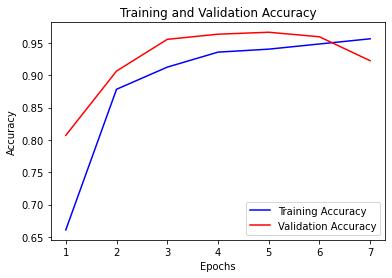

In [30]:
import matplotlib.pyplot as plt

# Plot accuracy graph
epochs = range(1, len(train_accuracy_history) + 1)

plt.plot(epochs, train_accuracy_history, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy_history, 'r', labl='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [31]:
# TESTING
model.eval()  # Set the model to evaluation mode

test_loss = 0.0
test_correct = 0
test_total = 0

with torch.no_grad():  # Turn off gradient tracking for testing
    for test_batch_data, test_batch_labels in test_loader:

        # Forward pass
        output = model(test_batch_data)
        labels = test_batch_labels.view(-1)

        test_loss += criterion(output, labels.long()).item()
        _, predicted = torch.max(output.data, 1)
        test_total += test_batch_labels.size(0)
        test_correct += (predicted == test_batch_labels).sum().item()

test_loss /= len(test_loader)
test_accuracy = test_correct / test_total

print(f"Test Loss: {test_loss:.4f} | Accuracy: {test_accuracy:.2f}")


Test Loss: 0.2334 | Accuracy: 0.92


In [32]:
# After training, saving the model
torch.save(model.state_dict(), 'anomaly_detector.pth')